In [194]:
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from skimage.measure import label
from sklearn.cluster import KMeans

In [195]:
def compute_variation(image):
    return np.var(image)

def split_and_merge_with_threshold(image, threshold):
    def is_homogeneous(region):
        return compute_variation(region) < threshold

    def split_and_merge(region):
        if not is_homogeneous(region):
            h, w = region.shape
            h_half, w_half = h // 2, w // 2
            subregions = [
                region[:h_half, :w_half],
                region[:h_half, w_half:],
                region[h_half:, :w_half],
                region[h_half:, w_half:]
            ]
            for subregion in subregions:
                split_and_merge(subregion)
        else:
            return label(region)

    labeled_array = split_and_merge(image)
    return labeled_array.astype(np.uint8)


def region_growing(image, seeds, threshold=2):
    segmented = np.zeros_like(image)
    for seed in seeds:
        x, y = seed
        region_value = image[x, y]
        stack = [(x, y)]
        while stack:
            x, y = stack.pop()
            if segmented[x, y] == 0:
                segmented[x, y] = region_value
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < image.shape[0] and 0 <= ny < image.shape[1]:
                        if segmented[nx, ny] == 0 and abs(int(image[nx, ny]) - int(region_value)) <= threshold:
                            stack.append((nx, ny))
    return segmented

In [196]:
citra = [[3, 0, 29, 12, 12, 21, 12, 11],
         [29, 1, 29, 29, 12, 29, 3, 0],
         [29, 30, 3, 0, 4, 12, 20, 21],
         [3, 30, 30, 12, 1, 21, 0, 13],
         [30, 0, 30, 29, 12, 29, 1, 21],
         [3, 30, 3, 0, 21, 12, 3, 0],
         [29, 1, 29, 21, 1, 29, 31, 1],
         [3, 0, 30, 21, 0, 30, 30, 1]]

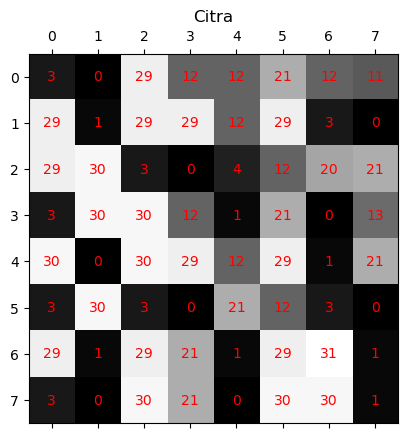

In [200]:
fig, ax = plt.subplots()
cax = ax.matshow(citra, cmap='gray')

for i in range(len(citra)):
    for j in range(len(citra[i])):
        ax.text(j, i, str(citra[i][j]), va='center', ha='center', color='red')

plt.title('Citra')
plt.show()

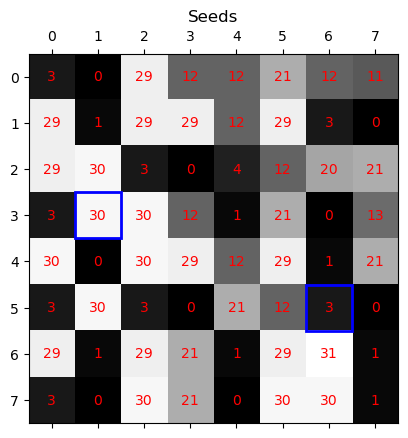

In [201]:
seeds = [(3, 1), (5, 6)]
fig, ax = plt.subplots()
cax = ax.matshow(citra, cmap='gray')

for i in range(len(citra)):
    for j in range(len(citra[i])):
        ax.text(j, i, str(citra[i][j]), va='center', ha='center', color='red')
for seed in seeds:
    ax.add_patch(plt.Rectangle((seed[1]-0.5, seed[0]-0.5), 1, 1, fill=None, edgecolor='blue', linewidth=2))

plt.title('Seeds')
plt.show()

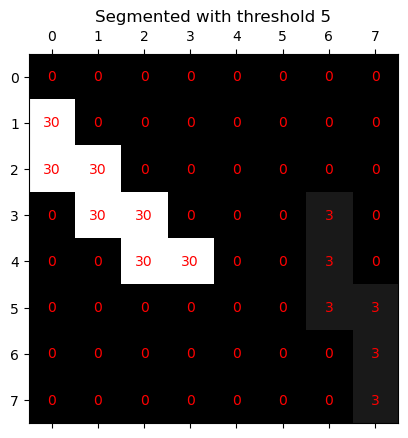

In [233]:
segmented = region_growing(np.array(citra), seeds, threshold=5)
fig, ax = plt.subplots()
cax = ax.matshow(segmented, cmap='gray')

for i in range(len(segmented)):
    for j in range(len(segmented[i])):
        ax.text(j, i, str(segmented[i][j]), va='center', ha='center', color='red')

plt.title(f'Segmented with threshold {5}')
plt.show()

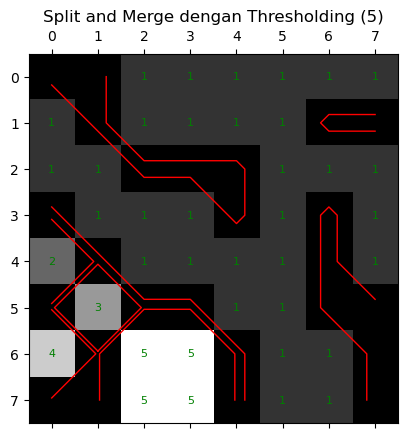

In [230]:
from skimage.measure import label, find_contours, regionprops

threshold_value = 5
citra_array = np.array(citra)
binary_image = (citra_array > threshold_value).astype(np.uint8)

label_image = label(binary_image, connectivity=1)

fig, ax = plt.subplots()
cax = ax.matshow(label_image, cmap='gray')

contours = find_contours(label_image, 0.18)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='red')

num_regions = label_image.max()  # Menghitung jumlah wilayah
plt.title(f'Split and Merge dengan Thresholding ({5})')

# Tambahkan nilai setiap piksel
for region in regionprops(label_image):
    for coord in region.coords:
        y, x = coord
        ax.text(x, y, str(label_image[y, x]), color='green', fontsize=8, ha='center', va='center')

plt.show()


d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


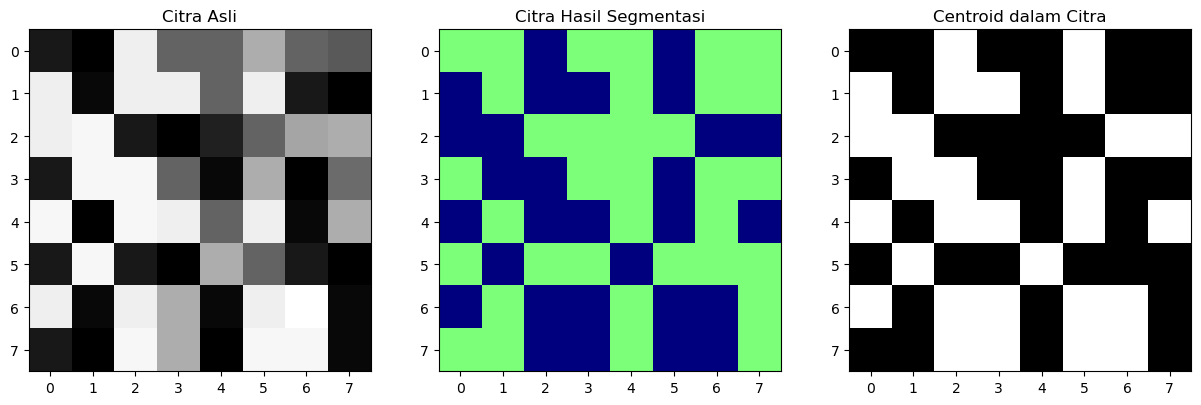

Cluster Centroids:
[[27.13793103]
 [ 4.42857143]]


In [229]:
citra = np.array(citra)
citra_reshaped = citra.reshape(-1, 1)

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=3).fit(citra_reshaped)
segmented_image = kmeans.labels_.reshape(citra.shape)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(citra, cmap='gray')
ax[0].set_title('Citra Asli')

colors = ['red', 'blue']
clustered_img_colored = np.zeros((*segmented_image.shape, 3))

for i in range(2):
    clustered_img_colored[segmented_image == i] = np.array(plt.cm.jet(i / 2))[:3]

ax[1].imshow(clustered_img_colored)
ax[1].set_title('Citra Hasil Segmentasi')

centroids = kmeans.cluster_centers_

centroid_img = np.zeros_like(citra, dtype=float)
for i, center in enumerate(centroids):
    centroid_img[segmented_image == i] = center

ax[2].imshow(centroid_img, cmap='gray')
ax[2].set_title('Centroid dalam Citra')

plt.show()

print("Cluster Centroids:")
print(centroids)

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


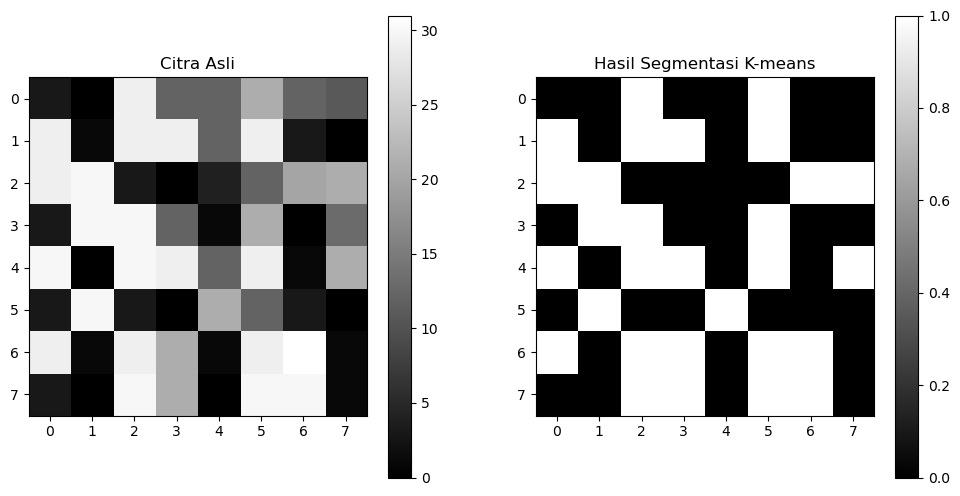

array([[False, False,  True, False, False,  True, False, False],
       [ True, False,  True,  True, False,  True, False, False],
       [ True,  True, False, False, False, False,  True,  True],
       [False,  True,  True, False, False,  True, False, False],
       [ True, False,  True,  True, False,  True, False,  True],
       [False,  True, False, False,  True, False, False, False],
       [ True, False,  True,  True, False,  True,  True, False],
       [False, False,  True,  True, False,  True,  True, False]])

In [240]:
citra_flat = citra.flatten().reshape(-1, 1)

seed_black = citra[3][1]  # 30
seed_grey = citra[5][6]   # 3
initial_centroids = np.array([[seed_black], [seed_grey]])

kmeans = KMeans(n_clusters=2, max_iter=3, init=initial_centroids, n_init=1)
kmeans.fit(citra_flat)
labels = kmeans.labels_.reshape(citra.shape)

centroids = kmeans.cluster_centers_

inverted_labels = np.invert(labels.astype(bool))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(citra, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Hasil Segmentasi K-means")
plt.imshow(inverted_labels, cmap='gray')
plt.colorbar()

plt.show()

inverted_labels